<a href="https://colab.research.google.com/github/DDoesCode/ECOTRAVEL/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Target variable

# Split into features and target
X = df.drop(columns=['Price']).values
y = df['Price'].values.reshape(-1, 1)

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

class HousePrice(nn.Module):
  def __init__ (self):
    super(HousePrice, self).__init__(); # calls the parent class (nn.Module) constructor.
    self.fc1=nn.Linear(X.shape[1],64);
    self.fc2=nn.Linear(64,32);
    self.fc3=nn.Linear(32,1);
    self.relu=nn.ReLU(); #Initializes a ReLU activation function, used in the forward method to introduce non-linearity.
    self.leakyrelu= nn.LeakyReLU(negative_slope=0.01)#LeakyRelu activation
    self.dropout=nn.Dropout(p=0.3)#30% dropout

  def forward(self,x):
    x=self.relu(self.fc1(x))#input is passed through the first fully connected layer input to 64 neurons, relu actuvation to introduce non linearity
    x=self.relu(self.fc2(x))#transformed neuron 64 passed through second fully connected layer to 32 neurons along with relu
    x=self.fc3(x)#final layer reduces 32 to 1 output, without activation as no regression, raw data output required
    return x;

#Instantiate model, loss function, and optimizer
model=HousePrice()#instantiates house price
criterion=nn.MSELoss()
optimizer= optim.Adam(model.parameters(), lr=0.01)#adam has faster convergence compared to Stochastic gradient descent
#adam to update models weights while training, momentum and adaptive learning rates

#Training Loop
epochs=500
for epoch in range(epochs):

    model.train()#enables training mode for batch normalization or dropout
    optimizer.zero_grad()#clears old gradients before each iteration
    predictions=model(X_train_tensor)#passes training data through model
    loss=criterion(predictions, y_train_tensor)
    loss.backward()#computes gradient via backward propogation to adjust weights
    optimizer.step()#uses adam optimizer to update model parameters and adjust weights in the right direction
    if (epoch+1) % 50 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


# Evaluate the Model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test MSE Loss: {test_loss.item():.4f}')


Epoch [50/500], Loss: 0.4670
Epoch [100/500], Loss: 0.3810
Epoch [150/500], Loss: 0.3576
Epoch [200/500], Loss: 0.3368
Epoch [250/500], Loss: 0.3156
Epoch [300/500], Loss: 0.3000
Epoch [350/500], Loss: 0.2900
Epoch [400/500], Loss: 0.2823
Epoch [450/500], Loss: 0.2754
Epoch [500/500], Loss: 0.2699
Test MSE Loss: 0.2915


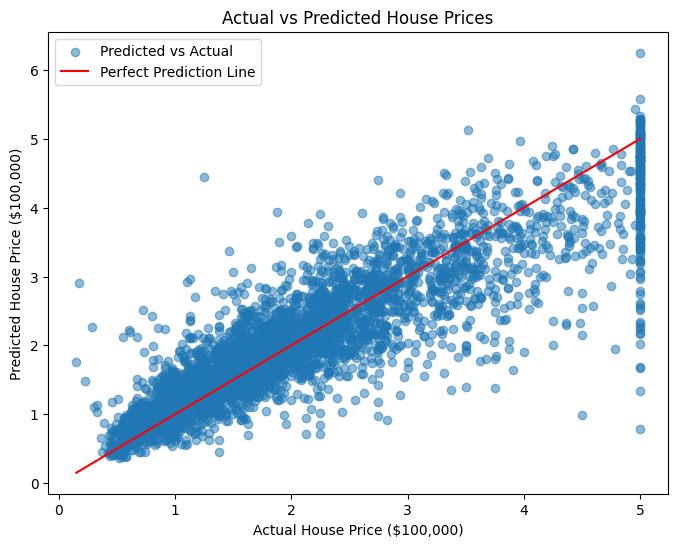

In [2]:
import matplotlib.pyplot as plt

# Convert tensors to NumPy for plotting
y_test_np = y_test_tensor.numpy().flatten()
y_pred_np = y_pred.numpy().flatten()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r', label="Perfect Prediction Line")
plt.xlabel("Actual House Price ($100,000)")
plt.ylabel("Predicted House Price ($100,000)")
plt.legend()
plt.title("Actual vs Predicted House Prices")
plt.show()



Predicted House Price: $158436.67


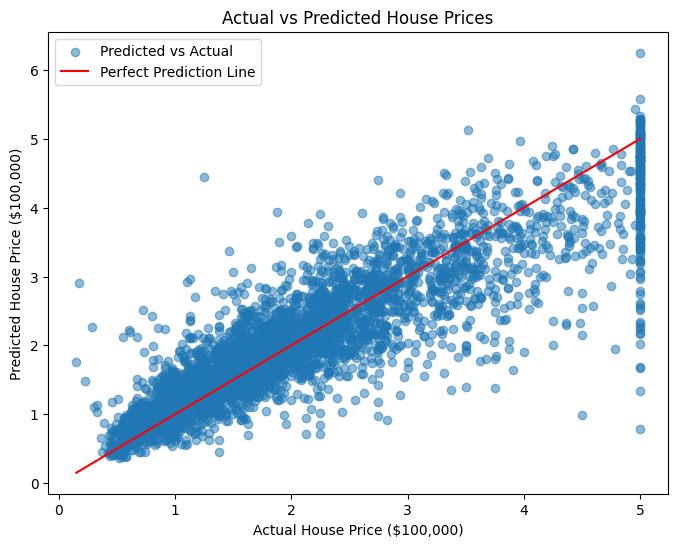

In [9]:
# Predict a New House Price
#MedInc (Median Income of the area) HouseAge AveRooms AveBedrms Population AveOccup Latitude = 34.5 Longitude = -118.5
new_house = np.array([[2.0, 25, 3, 1, 1000, 3, 34.5, -118.5]])
new_house_scaled = scaler.transform(new_house)
new_house_tensor = torch.tensor(new_house_scaled, dtype=torch.float32)

model.eval()
with torch.no_grad():
    predicted_price = model(new_house_tensor).item()

print(f'\nPredicted House Price: ${predicted_price * 100000:.2f}')

# Convert tensors to NumPy for visualization
y_test_np = y_test_tensor.numpy().flatten()
y_pred_np = y_pred.numpy().flatten()

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r', label="Perfect Prediction Line")
plt.xlabel("Actual House Price ($100,000)")
plt.ylabel("Predicted House Price ($100,000)")
plt.legend()
plt.title("Actual vs Predicted House Prices")
plt.show()